# SMS Spam Detection by Sanjay Patel

## Fetch the data

In [651]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import spacy
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [652]:
# import the spam email csv
df = pd.read_csv('email_train.csv', encoding='unicode_escape')
df_temp = pd.read_csv('email_test.csv', encoding='unicode_escape')

In [653]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [654]:
df_temp.head()

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam


In [655]:
df = pd.concat([df, df_temp])

In [656]:
# check if there are any null values
df.isna().sum()

S. No.          0
Message_body    0
Label           0
dtype: int64

In [657]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   object
 2   Label         1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 33.8+ KB


In [658]:
df['Message_body'] = df['Message_body'].astype('string')

In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        1082 non-null   int64 
 1   Message_body  1082 non-null   string
 2   Label         1082 non-null   object
dtypes: int64(1), object(1), string(1)
memory usage: 33.8+ KB


In [660]:
# remove unnecessary columns
df.drop(columns=['S. No.'], inplace=True)

In [661]:
# change label column to 0s and 1s
df['Label'].replace({'Non-Spam': 0, 'Spam': 1}, inplace=True)

In [662]:
# check if there are any null values
df.isna().sum()

Message_body    0
Label           0
dtype: int64

In [663]:
df.head()

,Message_body,Label
0,Rofl. Its true to its name,0
1,The guy did some bitching but I acted like i'd...,0
2,"Pity, * was in mood for that. So...any other s...",0
3,Will ü b going to esplanade fr home?,0
4,This is the 2nd time we have tried 2 contact u...,1


## Clean the data

In [664]:
def clean_text(text):
    
    # remove full stops
    text = re.sub(r'\.', ' ', text)

    # remove punctuation
    text = re.sub(r'[\[\]\'!?*,()/:-;+=#&^@<>£\"]', '', text)
    text = re.sub(r'ü', 'u', text)
    text = re.sub(r'\s+', ' ', text)


    return text

In [665]:
df['Message_body'] = df['Message_body'].apply(clean_text)

In [666]:
df.sample(50)

,Message_body,Label
319,Urgent Please call 09061213237 from a landline...,1
755,E admin building there I might b slightly earl...,0
227,u r subscribed 2 TEXTCOMP 250 wkly comp 1st wk...,1
787,O we cant see if we can join denis and mina Or...,0
16,Yeh Indians was nice Tho it did kane me off a ...,0
21,Cool what time you think you can get here,0
45,Todays Voda numbers ending 7548 are selected t...,1
421,Get your garden ready for summer with a FREE s...,1
96,No plans yet What are you doing,0
39,You are a winner U have been specially selecte...,1


In [667]:
nlp = spacy.load('en_core_web_md')

In [668]:
df

,Message_body,Label
0,Rofl Its true to its name,0
1,The guy did some bitching but I acted like id ...,0
2,Pity was in mood for that So any other suggest...,0
3,Will u b going to esplanade fr home,0
4,This is the 2nd time we have tried 2 contact u...,1
...,...,...
120,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
121,Try to do something dear You read something fo...,0
122,Sun ah Thk mayb can if dun have anythin on Thk...,0
123,SYMPTOMS when U are in love 1 U like listening...,0


## Working with the Text

In [669]:
# change all text to lowercase
df['Message_body'] = df['Message_body'].apply(lambda s: s.lower())

In [670]:
df['Message_body']

0                              rofl its true to its name
1      the guy did some bitching but i acted like id ...
2      pity was in mood for that so any other suggest...
3                    will u b going to esplanade fr home
4      this is the 2nd time we have tried 2 contact u...
                             ...                        
120    7 wonders in my world 7th you 6th ur style 5th...
121    try to do something dear you read something fo...
122    sun ah thk mayb can if dun have anythin on thk...
123    symptoms when u are in love 1 u like listening...
124     great have a safe trip dont panic surrender all 
Name: Message_body, Length: 1082, dtype: object

In [671]:
df['Message_body'][543]

'anyway holla at me whenever youre around because i need an excuse to go creep on people in sarasota'

In [672]:
stop_words = set(stopwords.words('english'))

In [673]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [674]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text) if w not in stop_words]

In [675]:
df['text_lemmatized'] = df['Message_body'].apply(lemmatize_text)

In [676]:
df

,Message_body,Label,text_lemmatized
0,rofl its true to its name,0,"[rofl, true, name]"
1,the guy did some bitching but i acted like id ...,0,"[guy, bitching, acted, like, id, interested, b..."
2,pity was in mood for that so any other suggest...,0,"[pity, mood, suggestion]"
3,will u b going to esplanade fr home,0,"[u, b, going, esplanade, fr, home]"
4,this is the 2nd time we have tried 2 contact u...,1,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
...,...,...,...
120,7 wonders in my world 7th you 6th ur style 5th...,0,"[7, wonder, world, 7th, 6th, ur, style, 5th, u..."
121,try to do something dear you read something fo...,0,"[try, something, dear, read, something, exam]"
122,sun ah thk mayb can if dun have anythin on thk...,0,"[sun, ah, thk, mayb, dun, anythin, thk, book, ..."
123,symptoms when u are in love 1 u like listening...,0,"[symptom, u, love, 1, u, like, listening, song..."


In [677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 0 to 124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Message_body     1082 non-null   object
 1   Label            1082 non-null   int64 
 2   text_lemmatized  1082 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.1+ KB


In [678]:
df['text_lemmatized'] = df['text_lemmatized'].astype('string')

In [679]:
df['text_lemmatized'] = df['text_lemmatized'].apply(clean_text)

In [680]:
df

,Message_body,Label,text_lemmatized
0,rofl its true to its name,0,rofl true name
1,the guy did some bitching but i acted like id ...,0,guy bitching acted like id interested buying s...
2,pity was in mood for that so any other suggest...,0,pity mood suggestion
3,will u b going to esplanade fr home,0,u b going esplanade fr home
4,this is the 2nd time we have tried 2 contact u...,1,2nd time tried 2 contact u u 750 pound prize 2...
...,...,...,...
120,7 wonders in my world 7th you 6th ur style 5th...,0,7 wonder world 7th 6th ur style 5th ur smile 4...
121,try to do something dear you read something fo...,0,try something dear read something exam
122,sun ah thk mayb can if dun have anythin on thk...,0,sun ah thk mayb dun anythin thk book e lesson ...
123,symptoms when u are in love 1 u like listening...,0,symptom u love 1 u like listening song 2 u get...


## Evaluate the Data

### Assign features and target variables

In [681]:
# Features and Labels
X = df['text_lemmatized']
y = df['Label']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### <b>Bag-of-Words using CountVectorizer

In [682]:
# init CountVectorizer()
vectorizer = CountVectorizer(stop_words='english')

# fit and transform the model
A = vectorizer.fit_transform(X_train, y_train)

In [683]:

df_bow_vec = pd.DataFrame(A.toarray(), columns=vectorizer.get_feature_names_out())
df_bow_vec

,0121,0207,02073162414,020903,021,05,06,061104,07046744435,07099833605,...,young,younger,youre,youve,yr,yummy,yuo,yup,zebra,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### <b>Testing Machine Learning Models

In [684]:
# init and fit the models
lr_model = LogisticRegression().fit(A, y_train)
svm_model = SVC(kernel='linear', probability=True).fit(A, y_train)
nb_model = GaussianNB().fit(A.toarray(), y_train)
dt_model = DecisionTreeClassifier().fit(A, y_train)

# transform test set
B = vectorizer.transform(X_test)

# print the scores
print('=== Logistic Regression ===')
print('Train score: ', lr_model.score(A, y_train))
print('Test score: ', lr_model.score(B, y_test))

print('\n')

print('=== Support Vector Machines ===')
print('Train score: ', svm_model.score(A, y_train))
print('Test score: ', svm_model.score(B, y_test))

print('\n')

print('=== Naive Bayes ===')
print('Train score: ', nb_model.score(A.toarray(), y_train))
print('Test score: ', nb_model.score(B.toarray(), y_test))

print('\n')

print('=== Decision Trees ===')
print('Train score: ', dt_model.score(A, y_train))
print('Test score: ', dt_model.score(B, y_test))

=== Logistic Regression ===
Train score:  0.9965317919075144
Test score:  0.9447004608294931


=== Support Vector Machines ===
Train score:  1.0
Test score:  0.9631336405529954


=== Naive Bayes ===
Train score:  0.9653179190751445
Test score:  0.8894009216589862


=== Decision Trees ===
Train score:  1.0
Test score:  0.9308755760368663


In [685]:
# get predictions for each model
lr_predict = lr_model.predict(B)
svm_predict = svm_model.predict(B)
nb_predict = nb_model.predict(B.toarray())
dt_predict = dt_model.predict(B)


# get probability for each model
lr_proba = lr_model.predict_proba(B)[:, 1]
svm_proba = svm_model.predict_proba(B)[:, 1]
nb_proba = nb_model.predict_proba(B.toarray())[:, 1]
dt_proba = dt_model.predict_proba(B)[:, 1]

# calculate fpr and tpr for each model
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_proba)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_proba)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_proba)

# calculate roc curve for each model
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

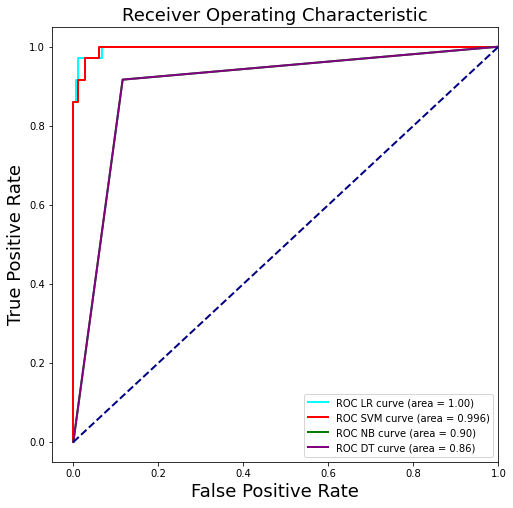

In [686]:
# set figure size
plt.figure(figsize=[8,8])

# plot each of the models
plt.plot(fpr_lr, tpr_lr, color='cyan', lw = 2, label = 'ROC LR curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='r', lw = 2, label = 'ROC SVM curve (area = %0.3f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='g', lw = 2, label = 'ROC NB curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nb, tpr_nb, color='purple', lw = 2, label = 'ROC DT curve (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [687]:
# helper function to show results and charts
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, probabilities)
    average_precision = average_precision_score(actual, probabilities)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)




========== LOGISTIC REGRESSION ==========


Accuracy : 0.9447 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6667 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9972                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


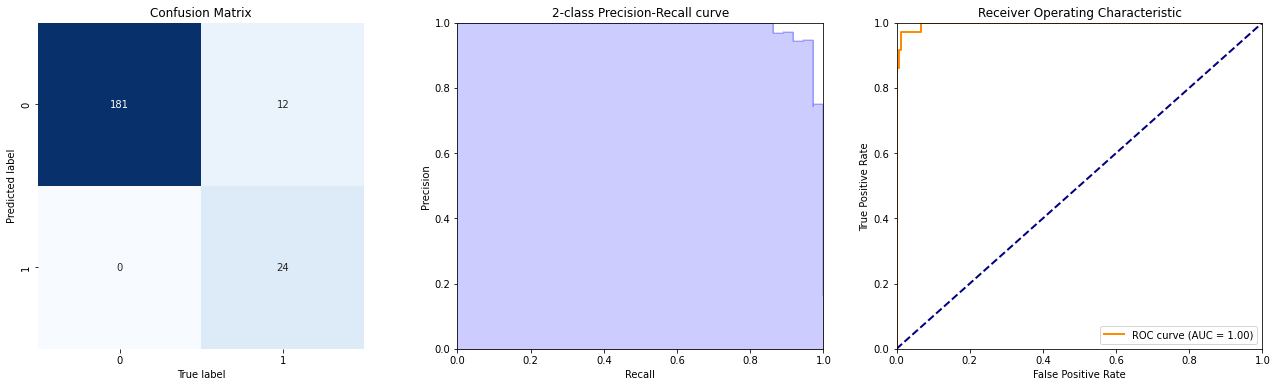




==========SUPPORT VECTOR MACHINES ==========


Accuracy : 0.9631 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7778 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9962                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


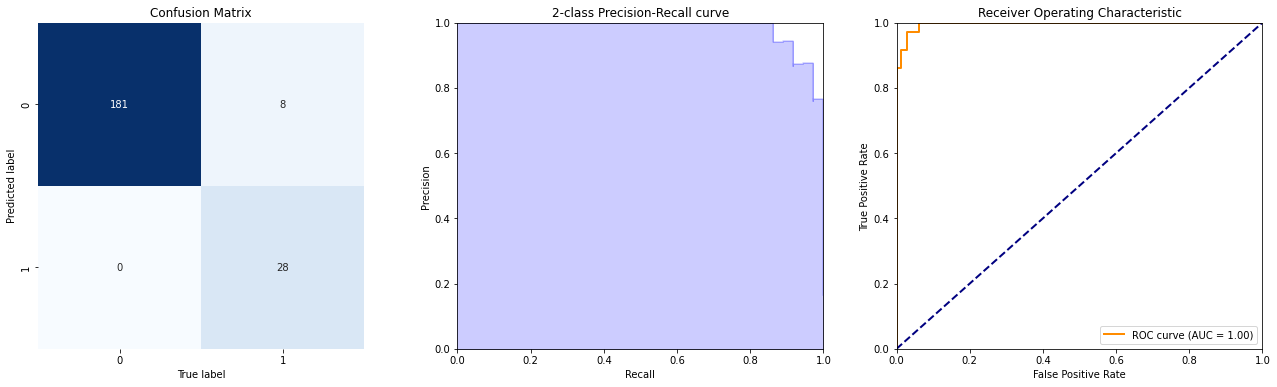




========== NAIVE BAYES ==========


Accuracy : 0.8894 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6111 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9003                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


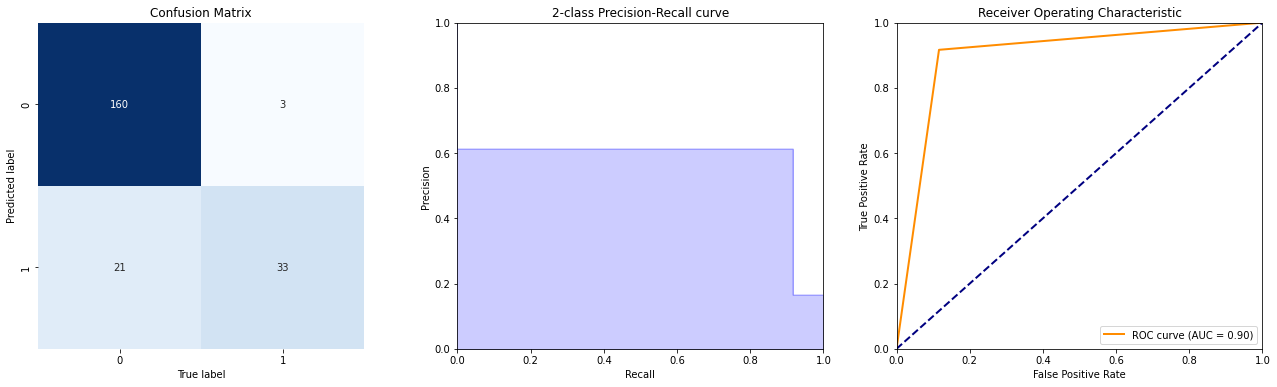




========== DECISION TREES ==========


Accuracy : 0.9309 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.8182 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7500 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.8584                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


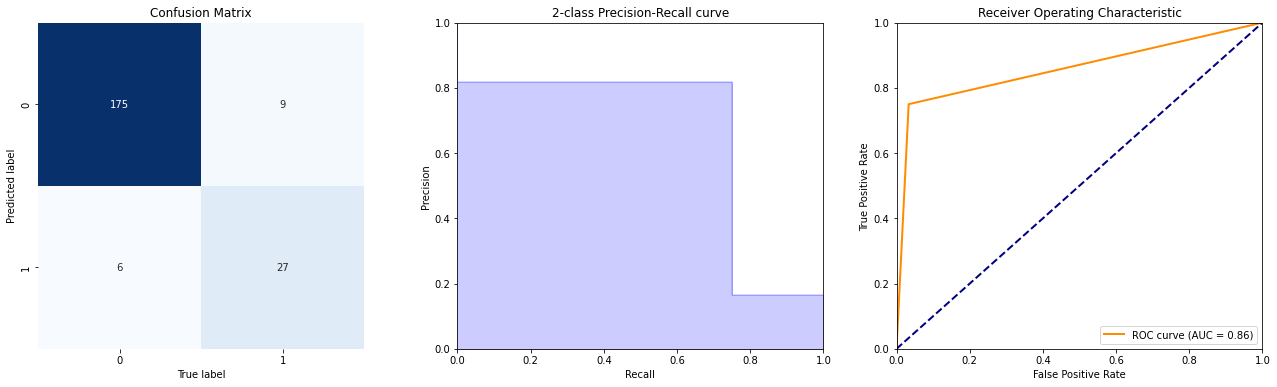

(0.9308755760368663, 0.8181818181818182, 0.75, 0.8584254143646409)

In [688]:
# summary reports of each of the models
print('\n\n')
print('========== LOGISTIC REGRESSION ==========')
print('\n')
show_summary_report(y_test, lr_predict, lr_proba)

print('\n\n')

print('==========SUPPORT VECTOR MACHINES ==========')
print('\n')
show_summary_report(y_test, svm_predict, svm_proba)

print('\n\n')

print('========== NAIVE BAYES ==========')
print('\n')
show_summary_report(y_test, nb_predict, nb_proba)


print('\n\n')

print('========== DECISION TREES ==========')
print('\n')
show_summary_report(y_test, dt_predict, dt_proba)

### Bag-of-Words using TD-IDF

#### <b>Testing Machine Learning Models

In [689]:
# create a matrix of word vectorizer from the text
# use TF-IDF
tfidf = TfidfVectorizer(stop_words='english')

# do the actual counting
C = tfidf.fit_transform(X_train, y_train)

# do the transformation for the test data
# NOTE: use `transform()` instead of `fit_transform()`
D = tfidf.transform(X_test)

In [690]:
lr_tfid_model = LogisticRegression().fit(C, y_train)
svm_tfidf_model = SVC(probability=True).fit(C, y_train)
nb_tfidf_model = GaussianNB().fit(C.toarray(), y_train)
dt_tfidf_model = DecisionTreeClassifier().fit(C, y_train)

# print the scores
print('=== Logistic Regression ===')
print('Train score: ', lr_tfid_model.score(C, y_train))
print('Test score: ', lr_tfid_model.score(D, y_test))

print('\n')

print('=== Support Vector Machines ===')
print('Train score: ', svm_tfidf_model.score(C, y_train))
print('Test score: ', svm_tfidf_model.score(D, y_test))

print('\n')

print('=== Naive Bayes ===')
print('Train score: ', nb_tfidf_model.score(C.toarray(), y_train))
print('Test score: ', nb_tfidf_model.score(D.toarray(), y_test))

print('\n')

print('=== Decision Trees ===')
print('Train score: ', dt_tfidf_model.score(C, y_train))
print('Test score: ', dt_tfidf_model.score(D, y_test))

=== Logistic Regression ===
Train score:  0.923699421965318
Test score:  0.9216589861751152


=== Support Vector Machines ===
Train score:  1.0
Test score:  0.9308755760368663


=== Naive Bayes ===
Train score:  0.9653179190751445
Test score:  0.8986175115207373


=== Decision Trees ===
Train score:  1.0
Test score:  0.8986175115207373


In [691]:
# get predictions for each model
lr_predict = lr_tfid_model.predict(D)
svm_predict = svm_tfidf_model.predict(D)
nb_predict = nb_tfidf_model.predict(D.toarray())
dt_predict = dt_tfidf_model.predict(B)


# get probability for each model
lr_proba = lr_tfid_model.predict_proba(D)[:, 1]
svm_proba = svm_tfidf_model.predict_proba(D)[:, 1]
nb_proba = nb_tfidf_model.predict_proba(D.toarray())[:, 1]
dt_proba = dt_tfidf_model.predict_proba(D)[:, 1]

# calculate fpr and tpr for each model
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, lr_proba)
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, svm_proba)
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test, nb_proba)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test, dt_proba)

# calculate roc curve for each model
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
roc_auc_svm = metrics.auc(fpr_svm, tpr_svm)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)

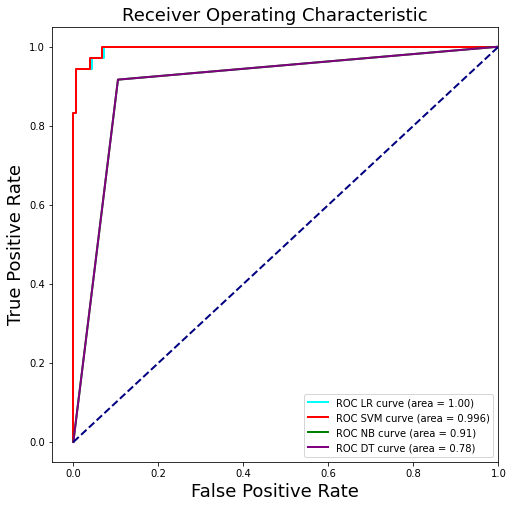

In [694]:
# set figure size
plt.figure(figsize=[8,8])

# plot each of the models
plt.plot(fpr_lr, tpr_lr, color='cyan', lw = 2, label = 'ROC LR curve (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_svm, tpr_svm, color='r', lw = 2, label = 'ROC SVM curve (area = %0.3f)' % roc_auc_svm)
plt.plot(fpr_nb, tpr_nb, color='g', lw = 2, label = 'ROC NB curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nb, tpr_nb, color='purple', lw = 2, label = 'ROC DT curve (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()




========== LOGISTIC REGRESSION ==========


Accuracy : 0.9217 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5278 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9962                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


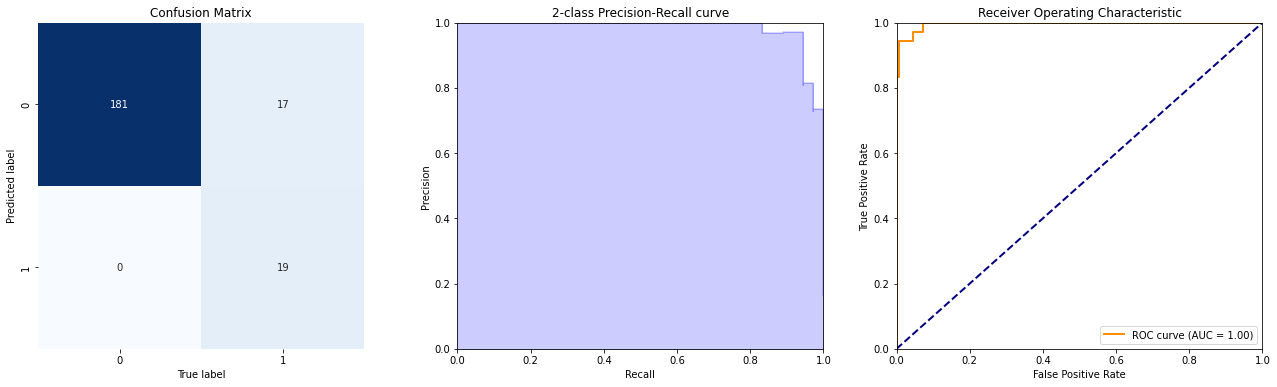




==========SUPPORT VECTOR MACHINES ==========


Accuracy : 0.9309 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5833 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9965                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


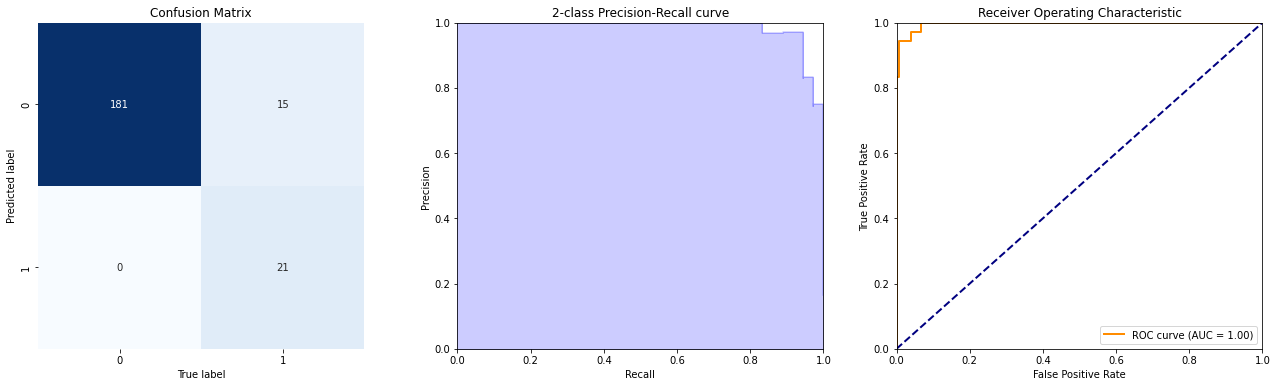




========== NAIVE BAYES ==========


Accuracy : 0.8986 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6346 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9167 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9058                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


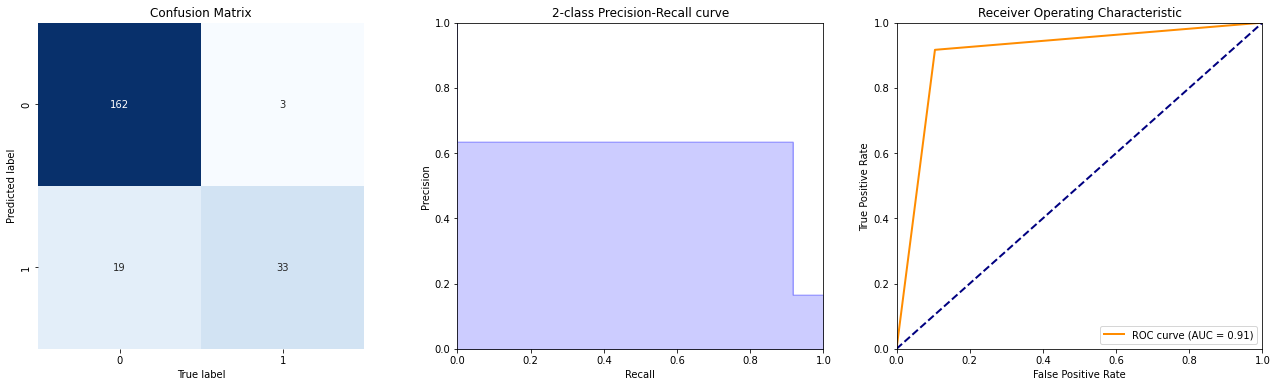




========== DECISION TREES ==========


Accuracy : 0.8894 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.7500 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.5000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.7835                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


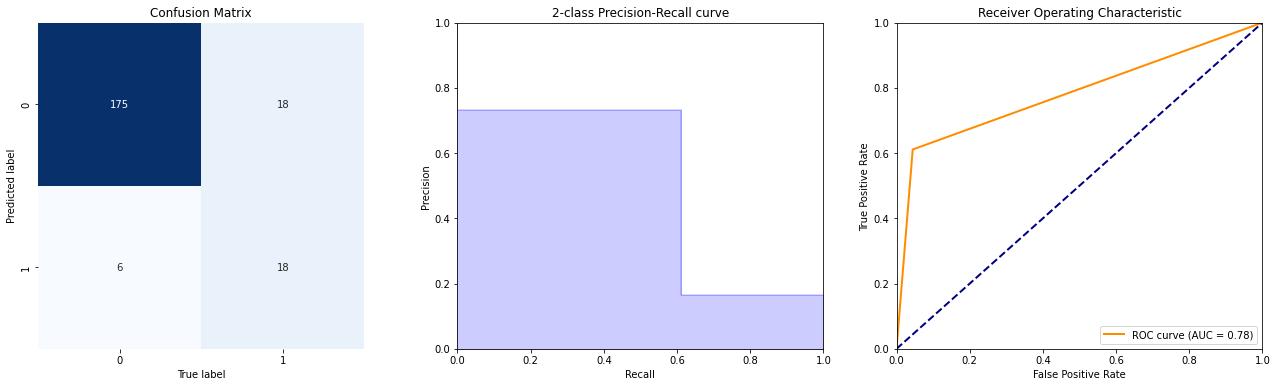

(0.8894009216589862, 0.75, 0.5, 0.7834561080417434)

In [695]:
# summary reports of each of the models
print('\n\n')
print('========== LOGISTIC REGRESSION ==========')
print('\n')
show_summary_report(y_test, lr_predict, lr_proba)

print('\n\n')

print('==========SUPPORT VECTOR MACHINES ==========')
print('\n')
show_summary_report(y_test, svm_predict, svm_proba)

print('\n\n')

print('========== NAIVE BAYES ==========')
print('\n')
show_summary_report(y_test, nb_predict, nb_proba)


print('\n\n')

print('========== DECISION TREES ==========')
print('\n')
show_summary_report(y_test, dt_predict, dt_proba)